# Final Project Generative AI

In the next document is going to be explained how to apply some models related to generative AI to achieve a business application.
The idea intended to achieve is to create an application that can capture videos, images (any graphical data), and model will detect the electronic devices and will provide the energy consumption that the gadget requires. 

First it is going to be developed the model framework with pretrained models and from it the model should be parametized to achieve the current goal. 

In the first part the steps provided are: 

1. Define the pipeline to use the camera's device and capture images in real time
2. Define a deep learning model that is going to detect the objects 
3. Execute the model over the images captured and fecth the results of the objects detected
4. provide the objects detected to an LLM  to ask for the object.
5. Show the results of the Popieline 

## 1. Image capture

In [2]:
# Importing the libraries related to image and video 
from PIL import Image,ImageDraw
import torch
import cv2
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import time
import torchvision.transforms as transforms

This code opens the camera device, the user need to press *S* to capture the desired frame. Aotumatically, it is going to be saved (title: datatime of the shot taken)

In [3]:

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret: 
        break
    cv2.imshow('Energy Consuption task', frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('s'):
        current_time = time.strftime("%Y%m%d%H%M%S")
        print("Saving Image " + current_time + ".jpg")
        file = "./" + current_time + ".jpg"
        print(file)
        cv2.imwrite(file, frame)
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Saving Image 20240415205732.jpg
./20240415205732.jpg
Saving Image 20240415205745.jpg
./20240415205745.jpg


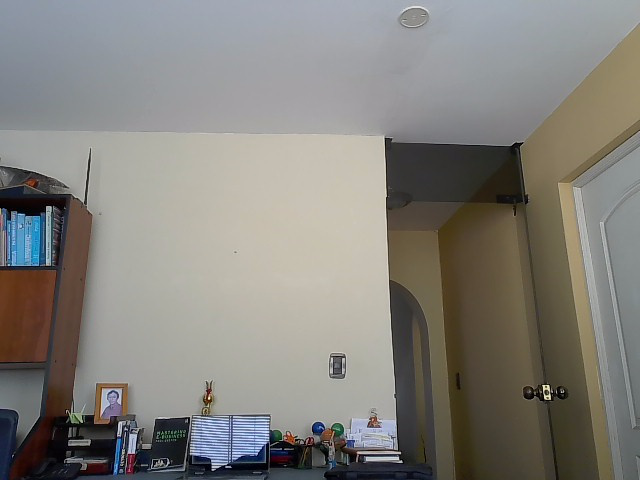

In [4]:
#| label: result-1
Image.open('./20240415205745.jpg')

# 2. Object detection

From the Open library Hugging face it is being searched a pre trained model that can help us in the classification task. The model picked is **Faster R-CNN**
https://huggingface.co/Theem/fasterrcnn_resnet50_fpn_grayscale 

This model pretrained possess a classification model with 91 classes

In [5]:

model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

c:\Users\jeanl\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jeanl\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In the next code is defined a function that is going:
1. trasnform the image input to a tensor (needed for the model to process it)
2. Executhe the Neural Network model on the image and attatch the resultd on the predictions object.

In [6]:
def detect_objects(image):
    
    transform = transforms.Compose([
    transforms.ToTensor()])
    # Preprocess the image
    input_image = transform(image).unsqueeze(0)
    
    # Perform inference
    with torch.no_grad():
        predictions = model(input_image)[0]
    
    return predictions


Executing the previous function defined on the image captured in the first step

In [7]:
#| label: result-5
testing_image_path = './20240415205745.jpg'
testing_image = Image.open(testing_image_path).convert("RGB")

# Perform object detection on the testing image
detections = detect_objects(testing_image)

# Print the detection results
print(detections)


{'boxes': tensor([[3.2203e-01, 4.1001e+02, 1.9834e+01, 4.7844e+02],
        [1.4888e+02, 4.1843e+02, 1.9023e+02, 4.7068e+02],
        [1.6601e+01, 2.1219e+02, 2.5453e+01, 2.6549e+02],
        [3.0753e+01, 2.1413e+02, 4.0715e+01, 2.6554e+02],
        [2.3527e+01, 2.1504e+02, 3.2301e+01, 2.6518e+02],
        [0.0000e+00, 2.0175e+02, 6.4201e+01, 2.6924e+02],
        [1.2589e+02, 4.2713e+02, 1.3912e+02, 4.7381e+02],
        [4.4964e+01, 2.0565e+02, 5.3511e+01, 2.6715e+02],
        [1.1428e+02, 4.2024e+02, 1.3183e+02, 4.7452e+02],
        [5.0927e+01, 2.0562e+02, 6.1833e+01, 2.6271e+02],
        [1.0185e+01, 2.1170e+02, 2.7680e+01, 2.6598e+02],
        [2.5588e+01, 2.1307e+02, 4.4688e+01, 2.6691e+02],
        [5.5887e+00, 2.1109e+02, 4.2185e+01, 2.6668e+02],
        [3.9336e+01, 2.1138e+02, 4.6657e+01, 2.6600e+02],
        [3.2911e+02, 3.5286e+02, 3.4648e+02, 3.7866e+02],
        [8.6915e+00, 2.1093e+02, 1.7139e+01, 2.6546e+02],
        [1.2237e+02, 4.2523e+02, 1.3136e+02, 4.7357e+02],
    

The creation of a dictionary of the classes that possess the pre trained model **Faster R-CNN**. Later this dictionary will be used to pass this data to the LLM model

In [8]:
coco_classes = {
    1: "Person", 2: "Bicycle", 3: "Car", 4: "Motorcycle", 5: "Airplane",
    6: "Bus", 7: "Train", 8: "Truck", 9: "Boat", 10: "Traffic light",
    11: "Fire hydrant", 12: "Stop sign", 13: "Parking meter", 14: "Bench",
    15: "Bird", 16: "Cat", 17: "Dog", 18: "Horse", 19: "Sheep", 20: "Cow",
    21: "Elephant", 22: "Bear", 23: "Zebra", 24: "Giraffe", 25: "Backpack",
    26: "Umbrella", 27: "Handbag", 28: "Tie", 29: "Suitcase", 30: "Frisbee",
    31: "Skis", 32: "Snowboard", 33: "Sports ball", 34: "Kite", 35: "Baseball bat",
    36: "Baseball glove", 37: "Skateboard", 38: "Surfboard", 39: "Tennis racket",
    40: "Bottle", 41: "Wine glass", 42: "Cup", 43: "Fork", 44: "Knife",
    45: "Spoon", 46: "Bowl", 47: "Banana", 48: "Apple", 49: "Sandwich",
    50: "Orange", 51: "Broccoli", 52: "Carrot", 53: "Hot dog", 54: "Pizza",
    55: "Donut", 56: "Cake", 57: "Chair", 58: "Couch", 59: "Potted plant",
    60: "Bed", 61: "Dining table", 62: "Toilet", 63: "TV", 64: "Laptop",
    65: "Mouse", 66: "Remote", 67: "Keyboard", 68: "Cell phone", 69: "Microwave",
    70: "Oven", 71: "Toaster", 72: "Sink", 73: "Refrigerator", 74: "Book",
    75: "Clock", 76: "Vase", 77: "Scissors", 78: "Teddy bear", 79: "Hair drier",
    80: "Toaster",81: "Sink",82: "Refrigerator",83: "Blender",84: "Book",
    85: "Clock",86: "Vase",87: "Scissors",88: "Teddy bear",89: "Hair drier",
    90: "Toothbrush",91: "Hairbrush",
}

In [3]:
#pip install python-dotenv

  Obtaining dependency information for python-dotenv from https://files.pythonhosted.org/packages/6a/3e/b68c118422ec867fa7ab88444e1274aa40681c606d59ac27de5a5588f082/python_dotenv-1.0.1-py3-none-any.whl.metadata
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


To use the LLM models that exists in Huggging Face it can be downloeaded from the webpage. However, this models are heavy and for this matter it is going to be used the Hugginf Face api to make a conection to the Open LLMs to use it.
To access it is needed a password to make the connection. This for terms of security is being save in another file and is put as a secret to create the connection.

In [9]:
from dotenv import load_dotenv
from pathlib import Path
dotenv_path = Path('./secret.env')
load_dotenv(dotenv_path=dotenv_path)

True

In [6]:

#pip install langchain

Note: you may need to restart the kernel to use updated packages.Collecting langchain
  Obtaining dependency information for langchain from https://files.pythonhosted.org/packages/ed/3e/93045d37eba24e0b5eb05312e30cd9e12805ea5f1ae9ba51ec8a7d2f5372/langchain-0.1.16-py3-none-any.whl.metadata
  Obtaining dependency information for dataclasses-json<0.7,>=0.5.7 from https://files.pythonhosted.org/packages/91/ca/7219b838086086972e662c19e908694bdc6744537fb41b70392501b8b5e4/dataclasses_json-0.6.4-py3-none-any.whl.metadata
  Using cached dataclasses_json-0.6.4-py3-none-any.whl.metadata (25 kB)
  Obtaining dependency information for jsonpatch<2.0,>=1.33 from https://files.pythonhosted.org/packages/73/07/02e16ed01e04a374e644b575638ec7987ae846d25ad97bcc9945a3ee4b0e/jsonpatch-1.33-py2.py3-none-any.whl.metadata
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for langchain-community<0.1,>=0.0.32 from https://files.pythonhosted.org/packages/6d/9e/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
panel 1.2.1 requires tqdm>=4.48.0, but you have tqdm 4.41.1 which is incompatible.
pdpbox 0.3.0 requires tqdm>=4.64.1, but you have tqdm 4.41.1 which is incompatible.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.


In [12]:
#pip install huggingface_hub

  Obtaining dependency information for huggingface_hub from https://files.pythonhosted.org/packages/05/c0/779afbad8e75565c09ffa24a88b5dd7e293c92b74eb09df6435fc58ac986/huggingface_hub-0.22.2-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec>=2023.5.0 from https://files.pythonhosted.org/packages/93/6d/66d48b03460768f523da62a57a7e14e5e95fdf339d79e996ce3cecda2cdb/fsspec-2024.3.1-py3-none-any.whl.metadata
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Obtaining dependency information for tqdm>=4.42.1 from https://files.pythonhosted.org/packages/2a/14/e75e52d521442e2fcc9f1df3c5e456aead034203d4797867980de558ab34/tqdm-4.66.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/388.9 kB ? eta -:--:--
   --------------------------------------- 388.9/388.9 kB 23.7 MB/s eta 0:00:00
Using cach

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2024.3.1 which is incompatible.


Using Langchain framework and Hugging face hub to make the connection with the next Open LLM modeL: Falcon-7b

https://huggingface.co/tiiuae/falcon-7b-instruct

In [2]:
from langchain import HuggingFaceHub
#repo_id = 'tiiuae/falcon-7b-instruct' 

repo_id = 'tiiuae/falcon-7b-instruct'
repo_id

'tiiuae/falcon-7b-instruct'

In [4]:
#| label: result-2
#| fig-cap: "Result of the LLM to a generic question"
llm = HuggingFaceHub(repo_id=repo_id) 
llm("What is a laptop?")

c:\Users\jeanl\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'What is a laptop?\nA laptop is a portable computer that is typically smaller than a desktop computer. It is designed to be used on the go and can be used for a variety of tasks, including browsing the internet, working on documents, and playing games.'

With the next function is send an especific question to the LLM and is fetched the asnwer

In [17]:



from langchain import HuggingFaceHub

def llm(prompt):
    repo_id = "tiiuae/falcon-7b-instruct" 
   
    llm = HuggingFaceHub(repo_id=repo_id, model_kwargs={"temperature": 0.5, "max_length": 3})
    answer = llm(prompt)
    answer = answer.split("\nA")[1].strip()
    return answer

Testing the function

In [18]:
object_name = 'flask'
llm(f'can you tell me what is a  {object_name}?')

'flask is a type of container, typically made of glass or metal, that is used to hold liquid substances.'

Finally this function is nested is the previous function to recognize the image and from it now for each of the objects that with a confidence over 80 % recognized the description of the object is put in the image.

In [24]:

testing_path = './20240415205732.jpg'
output_path ='./20240415205732_mod.jpg'
testing = Image.open(testing_path).convert('RGB')

detecting = detect_objects(testing)

draw = ImageDraw.Draw(testing)
for box, label, score in zip(detecting['boxes'], detecting['labels'], detecting['scores']):
    if score > 0.85:
        draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='green')
        if label.item() in coco_classes:  # Check if label exists in coco_classes
            description = llm(f"what is a {coco_classes[label.item()]}?")
            draw.text((box[0], box[1]), f"Label: {coco_classes[label.item()]}, Description: {description}", fill="red")

testing.save(output_path)

testing.show()  # Show the image with detections and descriptions


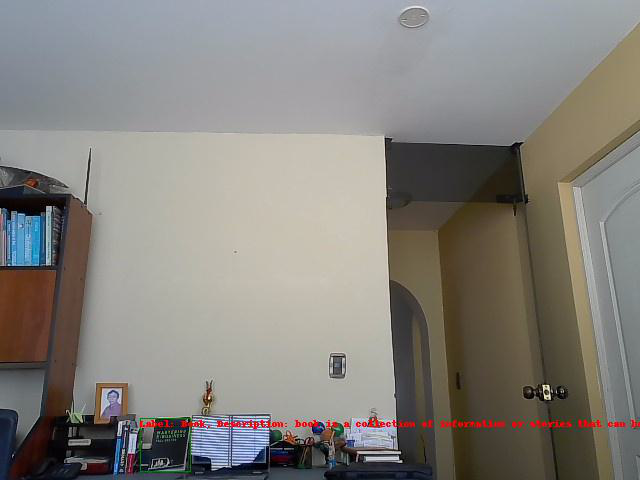

In [25]:
#| label: result-3
#| fig-cap: "Image with the description of the object detected"
Image.open(output_path)

## Adaptation of the current model

Now that the whole data pipeline is being modeled. It is needed some adjustments on the definition of the data objectives in each steps. In terms of constrain of time, it will no be fully developed but the next steps in this work are the next:

+ Transfer learning with the classification model to be specialized on electronic devices
+ Validate the probability of the model
+ Define good questions to send to the LLM
+ change the image format to be more easy to understand the messages to be put.